## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  22.025154   926.760258  0.581581  8.571733  1.650815
1  85.788876   908.866919  0.303053  4.222361  1.277543
2  72.163199   638.362448  0.765996  7.476173  1.268121
3   4.399441   241.994529  0.314296  3.788575  1.611280
4  13.161114  1370.059983  0.989842  6.538281  1.553077


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0487318	total: 68.8ms	remaining: 1m 8s
1:	learn: 1.0394523	total: 69.4ms	remaining: 34.6s
2:	learn: 1.0312796	total: 69.9ms	remaining: 23.2s
3:	learn: 1.0211111	total: 70.5ms	remaining: 17.5s
4:	learn: 1.0104696	total: 71ms	remaining: 14.1s
5:	learn: 1.0013179	total: 71.6ms	remaining: 11.9s
6:	learn: 0.9901639	total: 72.3ms	remaining: 10.3s
7:	learn: 0.9787211	total: 72.8ms	remaining: 9.02s
8:	learn: 0.9692857	total: 73.3ms	remaining: 8.07s
9:	learn: 0.9582596	total: 73.8ms	remaining: 7.31s
10:	learn: 0.9499474	total: 74.4ms	remaining: 6.69s
11:	learn: 0.9409555	total: 74.9ms	remaining: 6.17s
12:	learn: 0.9321105	total: 75.4ms	remaining: 5.73s
13:	learn: 0.9232311	total: 76ms	remaining: 5.35s
14:	learn: 0.9134890	total: 76.4ms	remaining: 5.02s
15:	learn: 0.9048163	total: 77ms	remaining: 4.73s
16:	learn: 0.8963982	total: 77.4ms	remaining: 4.47s
17:	learn: 0.8887479	total: 77.9ms	remaining: 4.25s
18:	learn: 0.8807851	total: 78.3ms	remaining: 4.04

108:	learn: 0.4082355	total: 118ms	remaining: 962ms
109:	learn: 0.4044900	total: 118ms	remaining: 956ms
110:	learn: 0.4018912	total: 119ms	remaining: 949ms
111:	learn: 0.3995253	total: 119ms	remaining: 943ms
112:	learn: 0.3968481	total: 119ms	remaining: 936ms
113:	learn: 0.3945096	total: 120ms	remaining: 931ms
114:	learn: 0.3916724	total: 120ms	remaining: 926ms
115:	learn: 0.3888078	total: 121ms	remaining: 920ms
116:	learn: 0.3859314	total: 121ms	remaining: 915ms
117:	learn: 0.3833452	total: 122ms	remaining: 909ms
118:	learn: 0.3809368	total: 122ms	remaining: 902ms
119:	learn: 0.3779586	total: 122ms	remaining: 896ms
120:	learn: 0.3750470	total: 123ms	remaining: 890ms
121:	learn: 0.3726769	total: 123ms	remaining: 885ms
122:	learn: 0.3699911	total: 123ms	remaining: 880ms
123:	learn: 0.3675287	total: 124ms	remaining: 875ms
124:	learn: 0.3649158	total: 124ms	remaining: 870ms
125:	learn: 0.3624305	total: 125ms	remaining: 865ms
126:	learn: 0.3603205	total: 125ms	remaining: 860ms
127:	learn: 

263:	learn: 0.1668690	total: 186ms	remaining: 518ms
264:	learn: 0.1658750	total: 186ms	remaining: 516ms
265:	learn: 0.1651966	total: 186ms	remaining: 515ms
266:	learn: 0.1646594	total: 187ms	remaining: 513ms
267:	learn: 0.1639970	total: 187ms	remaining: 512ms
268:	learn: 0.1635085	total: 188ms	remaining: 511ms
269:	learn: 0.1627059	total: 188ms	remaining: 509ms
270:	learn: 0.1621484	total: 189ms	remaining: 508ms
271:	learn: 0.1616471	total: 189ms	remaining: 507ms
272:	learn: 0.1610079	total: 190ms	remaining: 505ms
273:	learn: 0.1604111	total: 190ms	remaining: 504ms
274:	learn: 0.1595380	total: 191ms	remaining: 503ms
275:	learn: 0.1590714	total: 191ms	remaining: 501ms
276:	learn: 0.1584726	total: 191ms	remaining: 500ms
277:	learn: 0.1580375	total: 192ms	remaining: 498ms
278:	learn: 0.1575386	total: 192ms	remaining: 497ms
279:	learn: 0.1571187	total: 193ms	remaining: 496ms
280:	learn: 0.1567002	total: 193ms	remaining: 494ms
281:	learn: 0.1562017	total: 193ms	remaining: 493ms
282:	learn: 

524:	learn: 0.0656936	total: 299ms	remaining: 270ms
525:	learn: 0.0654923	total: 299ms	remaining: 270ms
526:	learn: 0.0652551	total: 300ms	remaining: 269ms
527:	learn: 0.0649585	total: 300ms	remaining: 268ms
528:	learn: 0.0647636	total: 300ms	remaining: 267ms
529:	learn: 0.0645305	total: 301ms	remaining: 267ms
530:	learn: 0.0643047	total: 301ms	remaining: 266ms
531:	learn: 0.0642138	total: 301ms	remaining: 265ms
532:	learn: 0.0640488	total: 302ms	remaining: 264ms
533:	learn: 0.0638219	total: 302ms	remaining: 264ms
534:	learn: 0.0636030	total: 302ms	remaining: 263ms
535:	learn: 0.0633167	total: 303ms	remaining: 262ms
536:	learn: 0.0630671	total: 303ms	remaining: 261ms
537:	learn: 0.0628342	total: 303ms	remaining: 261ms
538:	learn: 0.0626060	total: 304ms	remaining: 260ms
539:	learn: 0.0624481	total: 304ms	remaining: 259ms
540:	learn: 0.0622356	total: 305ms	remaining: 259ms
541:	learn: 0.0620133	total: 305ms	remaining: 258ms
542:	learn: 0.0618131	total: 306ms	remaining: 257ms
543:	learn: 

691:	learn: 0.0399872	total: 367ms	remaining: 163ms
692:	learn: 0.0398161	total: 368ms	remaining: 163ms
693:	learn: 0.0397639	total: 368ms	remaining: 162ms
694:	learn: 0.0397249	total: 368ms	remaining: 162ms
695:	learn: 0.0396742	total: 369ms	remaining: 161ms
696:	learn: 0.0396045	total: 369ms	remaining: 160ms
697:	learn: 0.0395103	total: 370ms	remaining: 160ms
698:	learn: 0.0393437	total: 370ms	remaining: 159ms
699:	learn: 0.0392950	total: 371ms	remaining: 159ms
700:	learn: 0.0392664	total: 371ms	remaining: 158ms
701:	learn: 0.0391996	total: 372ms	remaining: 158ms
702:	learn: 0.0390364	total: 372ms	remaining: 157ms
703:	learn: 0.0389893	total: 373ms	remaining: 157ms
704:	learn: 0.0389351	total: 373ms	remaining: 156ms
705:	learn: 0.0387407	total: 373ms	remaining: 156ms
706:	learn: 0.0385318	total: 374ms	remaining: 155ms
707:	learn: 0.0384864	total: 374ms	remaining: 154ms
708:	learn: 0.0384480	total: 375ms	remaining: 154ms
709:	learn: 0.0382504	total: 375ms	remaining: 153ms
710:	learn: 

953:	learn: 0.0194972	total: 480ms	remaining: 23.2ms
954:	learn: 0.0194512	total: 481ms	remaining: 22.7ms
955:	learn: 0.0194050	total: 481ms	remaining: 22.1ms
956:	learn: 0.0193681	total: 482ms	remaining: 21.6ms
957:	learn: 0.0193317	total: 482ms	remaining: 21.1ms
958:	learn: 0.0192866	total: 482ms	remaining: 20.6ms
959:	learn: 0.0192282	total: 483ms	remaining: 20.1ms
960:	learn: 0.0191710	total: 483ms	remaining: 19.6ms
961:	learn: 0.0191152	total: 484ms	remaining: 19.1ms
962:	learn: 0.0190794	total: 484ms	remaining: 18.6ms
963:	learn: 0.0190247	total: 485ms	remaining: 18.1ms
964:	learn: 0.0189712	total: 485ms	remaining: 17.6ms
965:	learn: 0.0189202	total: 486ms	remaining: 17.1ms
966:	learn: 0.0188849	total: 486ms	remaining: 16.6ms
967:	learn: 0.0188349	total: 486ms	remaining: 16.1ms
968:	learn: 0.0187692	total: 487ms	remaining: 15.6ms
969:	learn: 0.0187176	total: 488ms	remaining: 15.1ms
970:	learn: 0.0186828	total: 488ms	remaining: 14.6ms
971:	learn: 0.0186342	total: 488ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


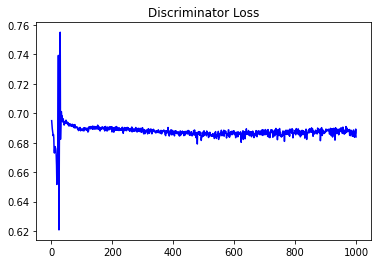

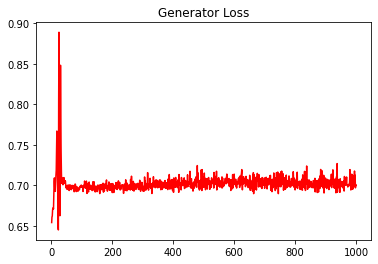

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2750179174350321


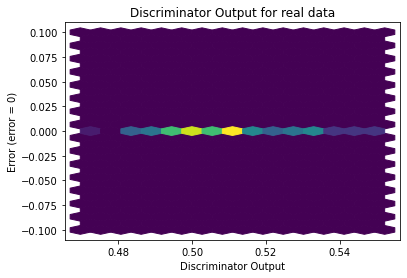

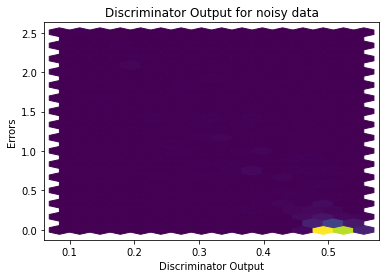

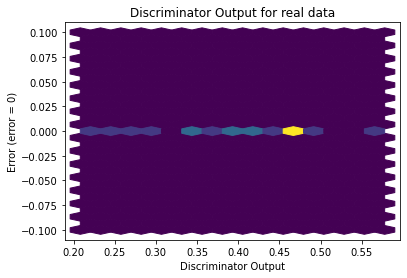

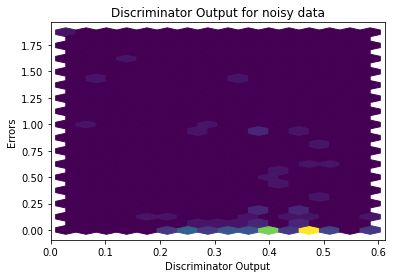

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9380]], requires_grad=True)
